# Quando ci si sposa a Lecce?
Ormai da diversi anni, il Comune di Lecce è impegnato fruttuosamente nell'apertura dei suoi dati. Tra questi, vi sono alcuni dataset riguardanti i matrimoni celebrati nei mesi degli anni 2015-2017 (i dati 2018 sono parziali). Anche se questo campione non è molto numeroso, possiamo usarlo per farci un'idea sui mesi in cui vengono celebrati più matrimoni nella splendida città salentina.

In [138]:
# Domenico Delle Side (nico @ delleside.org)
# tutto il codice e le figure presenti in questo notebook jupyter sono rilasciati
# con licenza Creative Commons Attribution 4.0 International (CC BY 4.0)
# https://creativecommons.org/licenses/by/4.0/

# carichiamo i moduli python necessari
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

# per semplificare le operazioni, creiamo un tipo di dato categorico
# per i mesi dell'anno
months_cat = CategoricalDtype(['gennaio', 'febbraio', 'marzo',
                               'aprile', 'maggio', 'giugno',
                               'luglio', 'agosto', 'settembre',
                               'ottobre', 'novembre', 'dicembre'], ordered=True)

# creiamo un array associativo (dict), con l'url del csv per ogni anno
anni_url = {'2015': 'https://goo.gl/P5NUSS', 
            '2016': 'https://goo.gl/lgc15l', 
            '2017': 'https://goo.gl/HIfh7n'}
# in questa lista ospiteremo di dati dei singoli anni
dati = []

In [146]:
# carichiamo i dati
for anno in anni_url:
    dati_tmp = pd.read_csv(anni_url[anno])
    dati_tmp = dati_tmp.fillna(0)
    dati.append(dati_tmp[['Anno', 'mese', 'matrimoni religiosi', 'matrimoni civili']])

del dati_tmp

In [147]:
# concateniamo i dati in un unico dataframe
alldata = pd.concat(dati)
# creiamo una singola serie contenente la somma di matrimoni civili e religiosi
alldata['matrimoni'] = alldata['matrimoni civili'] + alldata['matrimoni religiosi']
del alldata['matrimoni civili']
del alldata['matrimoni religiosi']
alldata.mese = alldata.mese.astype(months_cat)

In [148]:
# raggruppiamo i dati per mese
permonth = alldata.groupby('mese').agg({'matrimoni': np.sum})

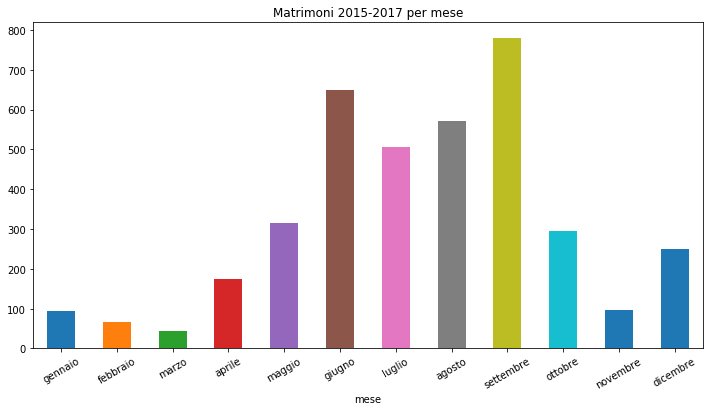

In [153]:
plt.subplots(figsize=(12,6))
permonth['matrimoni'].plot(kind='bar')
plt.title('Matrimoni 2015-2017 per mese')
plt.xticks(rotation=30)
plt.show()

Come si vede dalla figura in alto, il periodo estivo è quello in cui ci sono più matrimoni: settembre e giugno sono i mesi più gettonati, con agosto e luglio che seguono a ruota. Gli altri mesi sono senz'altro meno 'caldi'.

Il mese che in assoluto vede meno matrimoni è marzo. 